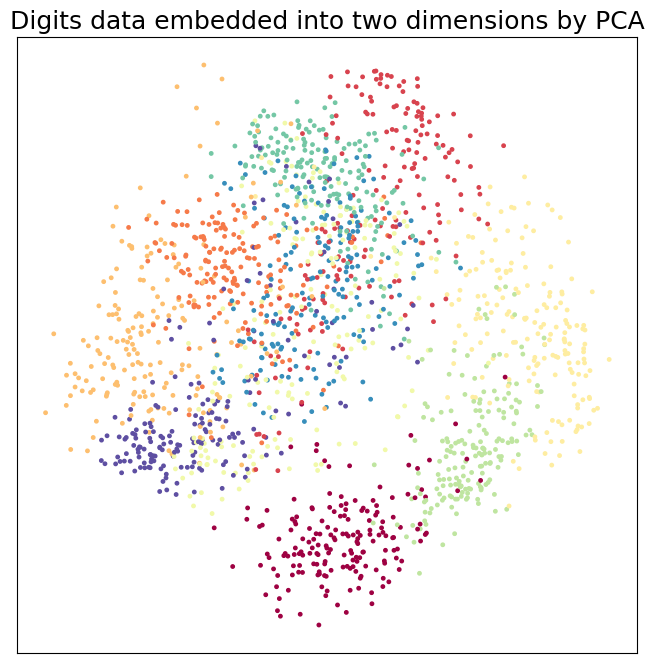

<Figure size 640x480 with 0 Axes>

In [1]:
def pca():

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn import datasets, decomposition
    from sklearn.datasets import load_digits

    digits = load_digits()

    X = digits.data
    y = digits.target

    pca = decomposition.PCA(n_components=2)
    principalComponents = pca.fit_transform(X)

    pca_data = np.vstack((principalComponents.T, y)).T
    pca_df = pd.DataFrame(
        data=pca_data, columns=("1st_principal", "2nd_principal", "label")
    )

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(
        pca_df["1st_principal"],
        pca_df["2nd_principal"],
        c=pca_df.label,
        cmap="Spectral",
        s=6,
    )
    plt.setp(ax, xticks=[], yticks=[])
    plt.title("Digits data embedded into two dimensions by PCA", fontsize=18)
    plt.show()
    plt.savefig("digits_pca.png")


pca()

También se puede hacer reducción de dimensionalidad usando sklearn.manifold.TSNE. Se podrá observar que se tienen regiones de dígitos mucho mejor definidas, includo cuando se tienen solo dos marcos de datos. En este caso, el marco de datos producido por este framework permitirá construir mejores clasificadores.

c:\Users\Alejandra Rojas\Documents\GitHub\PRE-24-reduccion-de-la-dimensionalidad-digits-Aleja7R\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


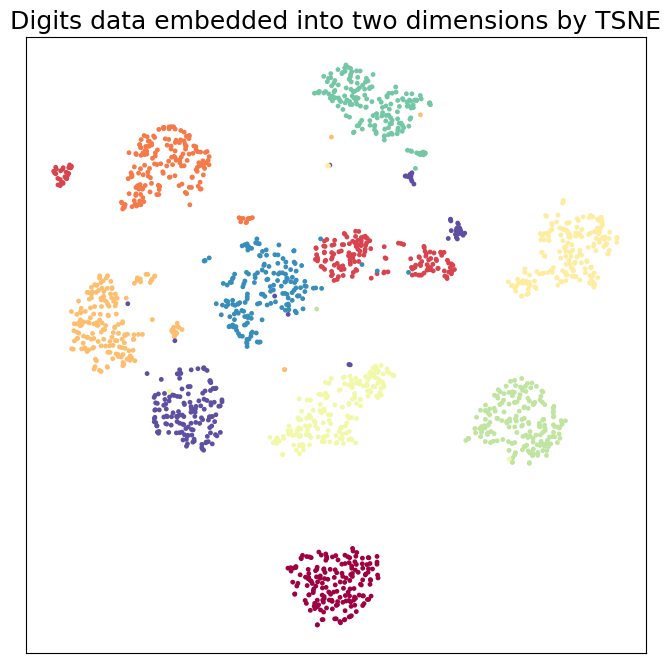

In [2]:
def tsne():

    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    import umap
    from sklearn import datasets, decomposition
    from sklearn.datasets import load_digits
    from sklearn.manifold import TSNE

    digits = load_digits()

    X = digits.data
    y = digits.target

    tsne = TSNE(n_components=2, random_state=0)
    embedding = tsne.fit_transform(X)

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap="Spectral", s=6)
    plt.setp(ax, xticks=[], yticks=[])
    plt.title("Digits data embedded into two dimensions by TSNE", fontsize=18)
    plt.savefig("digits_tsne.png")


tsne()

c:\Users\Alejandra Rojas\Documents\GitHub\PRE-24-reduccion-de-la-dimensionalidad-digits-Aleja7R\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


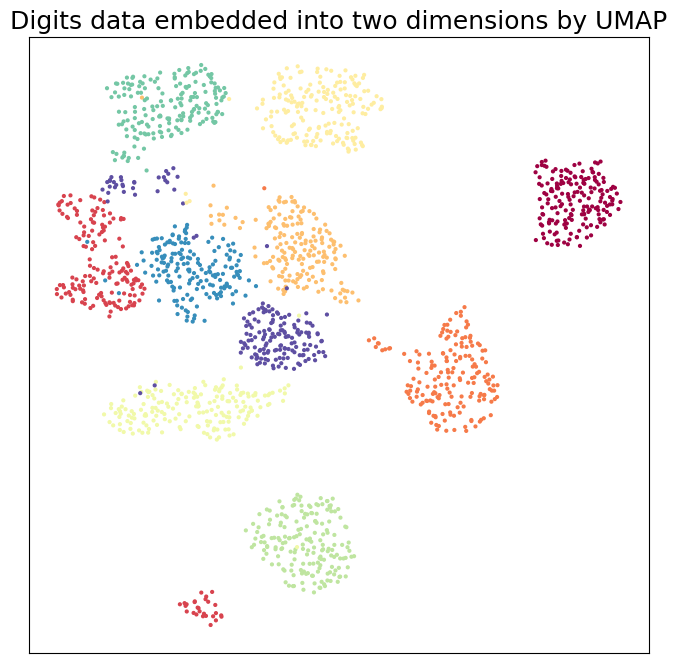

In [3]:
# Ahora veamos el caso de umap(), una función que implementa umap. También se definen unas buenas regiones.
# Uniform Manifold Approximation and Projection (UMAP)
#
def umap():

    import matplotlib.pyplot as plt
    import numpy as np
    import umap
    from sklearn import datasets, decomposition
    from sklearn.datasets import load_digits

    digits = load_digits()

    X = digits.data
    y = digits.target

    reducer = umap.UMAP(random_state=42, min_dist=0.8)
    embedding = reducer.fit_transform(digits.data)

    fig, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap="Spectral", s=4)
    plt.setp(ax, xticks=[], yticks=[])
    plt.title("Digits data embedded into two dimensions by UMAP", fontsize=18)
    plt.savefig("digits_umap.png")


umap()